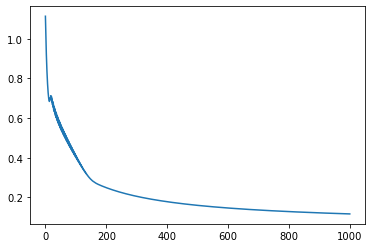

In [1]:
from sklearn import datasets  # Import the sklearn datasets module
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from d2l import torch as d2l
import numpy as np
import matplotlib.pyplot as plt

# 准备数据
iris = datasets.load_iris()
x = iris.data 
y = iris.target

x, x_test, y, y_test =  train_test_split(x,y)
# print('x', x)
m = x.shape[0]
n = x.shape[1]
N = 3
# Phi = np.hstack((x,np.ones((x.shape[0],1))))


# 定义模型
softmax = nn.Softmax(dim=1)
net = nn.Linear(4,3)
net.weight.data.normal_(0,0.01)
net.bias.data.zero_()
# net.parameters()

# 定义损失函数
loss = nn.CrossEntropyLoss()

# 定义优化函数
optimFunc = torch.optim.SGD(net.parameters(), lr = 0.1)

# 训练模型
num_epochs = 1000

x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

loss_record = []
train_acc_record = []
pred_suc = 0

def accurate(X, y):
    y_hat = net(X)
    y_hat_soft = softmax(y_hat)
    y_hat_index = torch.argmax(y_hat_soft, dim=1)
    num = np.sum(y_hat_index.numpy() == y.numpy())
    acc = num / y.shape[0]
    return acc

for i in range(num_epochs):
    # 将数据输入模型
    y_hat = net(x)
    
    # 计算损失并打印
    mLoss = loss(y_hat, y)
    loss_record.append(mLoss)
    
    # 梯度清零
    optimFunc.zero_grad()
    
    # 梯度更新
    mLoss.backward()
    optimFunc.step()
    
    acc = accurate(x, y)
    train_acc_record.append(acc)
#     print('y_hat', y_hat_soft)
#     print('y_hat_index', y_hat_index)
#     print('y', y)
    
plt.plot(loss_record)

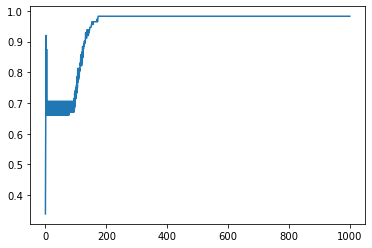

In [2]:
plt.plot(train_acc_record)

In [3]:
test_accurate = accurate(x_test, y_test)
print('test_accurate', test_accurate)

test_accurate 1.0
